# Iterative Policy Evaluation

In [3]:
children = {
    1: [0, 2, 5, 1],
    2: [1, 3, 6, 2],
    3: [2, 7, 3, 3],
    4: [0, 5, 8, 4],
    5: [1, 4, 6, 9],
    6: [2, 5, 7, 10],
    7: [3, 6, 11, 7],
    8: [4, 9, 12, 8],
    9: [5, 8, 10, 13],
    10: [6, 9, 11, 14],
    11: [0, 7, 10, 11],
    12: [8, 13, 12, 12],
    13: [9, 12, 14, 15],
    14: [10, 13, 0, 14],
    15: [12, 13, 14, 15]
}

In [4]:
V = [0,]*16

In [5]:
import math
while True:
    delta = 0
    for i in range(1, 16):
        v = V[i]
        V[i] = 0
        for child in children[i]:
            V[i] += 0.25*((-1 if child != 0 else 0) + V[child])
        delta = max(delta, abs(v - V[i]))
    print(delta, V)
    if delta < 1e-9:
        break

3.0243619680404663 [0, -0.875, -1.4609375, -1.9144287109375, -0.875, -1.4375, -1.724609375, -2.3246994018554688, -1.4609375, -1.724609375, -1.8623046875, -2.183438777923584, -1.9144287109375, -1.909759521484375, -2.053770065307617, -3.0243619680404663]
2.0014479756355286 [0, -1.78076171875, -2.8811874389648438, -3.3772995471954346, -1.78076171875, -2.752685546875, -3.455219268798828, -4.004986748099327, -2.8811874389648438, -3.3514842987060547, -3.760978102684021, -3.3018640158697963, -3.215213656425476, -3.9112074971199036, -3.2725579999387264, -4.437180985463783]
1.587232617661357 [0, -2.635585308074951, -4.146282538771629, -4.527839565183967, -2.635585308074951, -4.019468545913696, -4.982928983867168, -5.191447676537791, -4.063213519752026, -4.938716916367412, -5.124016979010776, -4.098582704858927, -4.458758209715597, -5.27680352787138, -4.1252564084006735, -5.519005670621141]
1.2550615134296095 [0, -3.4267972139641643, -5.230489300942281, -5.414819131828153, -3.400838145520538, -5

In [6]:
V.append(0)
J = [str(round(i)) for i in V]

In [7]:
for i in range(4):
    print(' '.join(J[4*i:4*i+4]))
print ('   '+str(round(V[15])))

0 -7 -9 -9
-7 -10 -11 -9
-10 -11 -10 -7
-9 -10 -7 -9
   -9


In [8]:
V

[0,
 -6.847539631077711,
 -9.328426833154495,
 -8.633672449122372,
 -6.912720407361489,
 -9.783699988054636,
 -10.569753787424746,
 -9.333774637250063,
 -9.537005317316101,
 -10.804786128166647,
 -9.833113692631107,
 -6.864652603087865,
 -9.000910481531593,
 -10.065325516158387,
 -7.093262252746717,
 -9.362343203261467,
 0]

## Jack's Car Rentals

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

def factorial(n):
    fact = 1
    for i in range(2, n+1):
        fact*=i
    return fact

def p(lamb, i):
    if i == 0:
        return [1]
    l = []
    l.append(math.exp(-lamb))
    sum = l[-1]
    for k in range(i):
        if k == 0:
            continue
        l.append(l[-1]*lamb/k)
        sum += l[-1]
    l.append(1-sum)
    return l

In [115]:
# Policy Initialization
V = np.zeros((21, 21))
from tqdm import tqdm

In [116]:
# Policy Evaluation
while True:
    delta = 0
    for i in tqdm(range(21)):
        for j in range(21):
            v = V[i][j]
            V[i][j] = 0
            count = 0
            for k in range(-5, 6):
                if i-k >= 0 and j+k >= 0:
                    count += 1
                    i_ = i-k
                    j_ = j+k
                    if i_ >= 20:
                        i_ = 20
                    if j_ >= 20:
                        j_ = 20
                    req1 = p(3, i_)
                    ret1 = p(3, 20-i_)
                    req2 = p(4, j_)
                    ret2 = p(2, 20-j_)
#                     print(20-j-k)
                    for p1 in range(len(req1)):
                        for p2 in range(len(ret1)):
                            for p3 in range(len(req2)):
                                for p4 in range(len(ret2)):
                                    V[i][j] += req1[p1]*ret1[p2]*req2[p3]*ret2[p4]*(-2*abs(k) + 10*(p1+p3) + 0.9*V[i_+p2-p1][j_+p4-p3])
            V[i][j] /= count
#             print(V[i][j])
            delta = max(delta, abs(v-V[i][j]))
    print(delta, '-------')
    if delta < 0.01:
        break

100%|███████████████████████████████████████████| 21/21 [00:20<00:00,  1.04it/s]


209.89773416176715 -------


100%|███████████████████████████████████████████| 21/21 [00:20<00:00,  1.01it/s]


131.8908414953799 -------


100%|███████████████████████████████████████████| 21/21 [00:20<00:00,  1.02it/s]


101.35808347488049 -------


100%|███████████████████████████████████████████| 21/21 [00:20<00:00,  1.00it/s]


81.9990465414981 -------


100%|███████████████████████████████████████████| 21/21 [00:20<00:00,  1.00it/s]


72.75142042840542 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.11s/it]


63.881777530574084 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.13s/it]


55.97476747603639 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.13s/it]


49.15381892200912 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.12s/it]


43.31170388244675 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.12s/it]


38.287163846017734 -------


100%|███████████████████████████████████████████| 21/21 [00:25<00:00,  1.21s/it]


33.94915854449073 -------


100%|███████████████████████████████████████████| 21/21 [00:24<00:00,  1.16s/it]


30.255252663864667 -------


100%|███████████████████████████████████████████| 21/21 [00:24<00:00,  1.17s/it]


27.03957498195507 -------


100%|███████████████████████████████████████████| 21/21 [00:25<00:00,  1.22s/it]


24.149031945331103 -------


100%|███████████████████████████████████████████| 21/21 [00:25<00:00,  1.20s/it]


21.55756436815659 -------


100%|███████████████████████████████████████████| 21/21 [00:24<00:00,  1.19s/it]


19.238271091277966 -------


100%|███████████████████████████████████████████| 21/21 [00:25<00:00,  1.21s/it]


17.16496968400611 -------


100%|███████████████████████████████████████████| 21/21 [00:24<00:00,  1.17s/it]


15.312999804220453 -------


100%|███████████████████████████████████████████| 21/21 [00:24<00:00,  1.17s/it]


13.6595857389716 -------


100%|███████████████████████████████████████████| 21/21 [00:24<00:00,  1.16s/it]


12.183947652348934 -------


100%|███████████████████████████████████████████| 21/21 [00:26<00:00,  1.26s/it]


10.867273945224952 -------


100%|███████████████████████████████████████████| 21/21 [00:26<00:00,  1.25s/it]


9.692620795004359 -------


100%|███████████████████████████████████████████| 21/21 [00:25<00:00,  1.22s/it]


8.644777277808544 -------


100%|███████████████████████████████████████████| 21/21 [00:24<00:00,  1.17s/it]


7.710118036328822 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.12s/it]


6.876455734811998 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.12s/it]


6.132899830567567 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.14s/it]


5.469724862978069 -------


100%|███████████████████████████████████████████| 21/21 [00:24<00:00,  1.15s/it]


4.878249550195392 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.12s/it]


4.350726909320201 -------


100%|███████████████████████████████████████████| 21/21 [00:24<00:00,  1.18s/it]


3.880245034607924 -------


100%|███████████████████████████████████████████| 21/21 [00:25<00:00,  1.20s/it]


3.460637874411077 -------


100%|███████████████████████████████████████████| 21/21 [00:24<00:00,  1.15s/it]


3.086405220605002 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.12s/it]


2.7526410896014113 -------


100%|███████████████████████████████████████████| 21/21 [00:24<00:00,  1.15s/it]


2.4549696930217806 -------


100%|███████████████████████████████████████████| 21/21 [00:22<00:00,  1.07s/it]


2.1894882394730075 -------


100%|███████████████████████████████████████████| 21/21 [00:22<00:00,  1.07s/it]


1.9527158665232491 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


1.7415480619371237 -------


100%|███████████████████████████████████████████| 21/21 [00:25<00:00,  1.21s/it]


1.5532159942625867 -------


100%|███████████████████████████████████████████| 21/21 [00:29<00:00,  1.38s/it]


1.3852502294973874 -------


100%|███████████████████████████████████████████| 21/21 [00:27<00:00,  1.31s/it]


1.2354483644683114 -------


100%|███████████████████████████████████████████| 21/21 [00:27<00:00,  1.32s/it]


1.1018461562048287 -------


100%|███████████████████████████████████████████| 21/21 [00:26<00:00,  1.27s/it]


0.9826917708230667 -------


100%|███████████████████████████████████████████| 21/21 [00:26<00:00,  1.28s/it]


0.8764228156355784 -------


100%|███████████████████████████████████████████| 21/21 [00:25<00:00,  1.23s/it]


0.7816458542450846 -------


100%|███████████████████████████████████████████| 21/21 [00:25<00:00,  1.22s/it]


0.6971181362617926 -------


100%|███████████████████████████████████████████| 21/21 [00:26<00:00,  1.25s/it]


0.6217313024778832 -------


100%|███████████████████████████████████████████| 21/21 [00:26<00:00,  1.25s/it]


0.5544968519609483 -------


100%|███████████████████████████████████████████| 21/21 [00:26<00:00,  1.24s/it]


0.4945331807622324 -------


100%|███████████████████████████████████████████| 21/21 [00:25<00:00,  1.24s/it]


0.44105402198829324 -------


100%|███████████████████████████████████████████| 21/21 [00:28<00:00,  1.36s/it]


0.3933581361393408 -------


100%|███████████████████████████████████████████| 21/21 [00:26<00:00,  1.25s/it]


0.350820116165778 -------


100%|███████████████████████████████████████████| 21/21 [00:27<00:00,  1.30s/it]


0.31288218694328407 -------


100%|███████████████████████████████████████████| 21/21 [00:25<00:00,  1.20s/it]


0.2790468915048905 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.13s/it]


0.24887056822888098 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.12s/it]


0.22195753335654445 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.11s/it]


0.19795489262480714 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.11s/it]


0.17654791401355396 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.11s/it]


0.1574559008322467 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.1404285111112813 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.11s/it]


0.1252424750754244 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.11s/it]


0.11169866743750845 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.09961949650664792 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.11s/it]


0.08884657543615049 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.07923864549445625 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.07066972371706015 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.0630274510496065 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.11s/it]


0.05621161902888616 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.11s/it]


0.05013285577297211 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.04471145417358002 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.03987632667849539 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.03556407321093502 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.12s/it]


0.031718149800212814 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.028288127211339997 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.025229029618913046 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.022500744959529584 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.020067498879143386 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.12s/it]


0.017897385710512026 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.01596195007721235 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.014235813781169782 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.11s/it]


0.012696343064135363 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.10s/it]


0.01132335177112509 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.11s/it]


0.010098836694396596 -------


100%|███████████████████████████████████████████| 21/21 [00:23<00:00,  1.11s/it]

0.00900674152751435 -------


In [ ]:
len(p(4, 1))

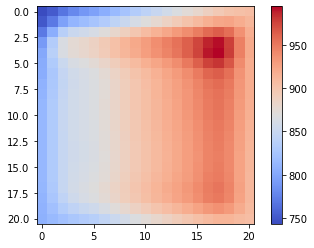

In [120]:
plt.imshow(V, cmap='coolwarm')
plt.colorbar()
plt.show()

In [118]:
V

array([[743.25831588, 752.71338688, 767.12570337, 779.51034681,
        788.39872554, 795.73763683, 805.41533909, 815.20623192,
        824.65709543, 833.60784591, 842.05660601, 850.09809436,
        857.86581789, 865.47894875, 873.01355234, 880.49296226,
        887.85535603, 894.79204521, 900.47618746, 903.99943748,
        905.93395118],
       [751.09447616, 770.36557347, 795.9615724 , 811.24937935,
        818.53041492, 824.72053092, 833.3627207 , 842.84996006,
        852.16052851, 861.02731615, 869.44379661, 877.50370938,
        885.33264783, 893.04332012, 900.73073529, 908.50833372,
        916.31917733, 922.80748455, 924.28560836, 918.7432394 ,
        911.91601192],
       [770.33370366, 805.58728535, 838.2388284 , 851.88894039,
        856.70933117, 862.39852941, 870.49262295, 879.89515138,
        889.2172694 , 898.13206481, 906.63394574, 914.81922152,
        922.81300502, 930.75633351, 938.92447631, 947.88033781,
        957.44489393, 963.13127083, 956.12096742, 935.8786

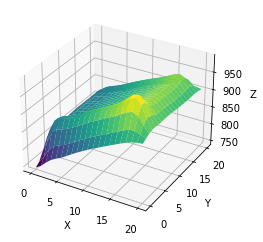

In [117]:
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(V.shape[1])
y = np.arange(V.shape[0])
x, y = np.meshgrid(x, y)

# z = np.log(V)/np.log(10)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, V, cmap='viridis')

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.show()

In [133]:
pi = np.zeros((21, 21))
for i in tqdm(range(21)):
    for j in range(21):
        count = 0
        action_dict = dict()
        for k in range(-5, 6):
            if i-k >= 0 and j+k >= 0:
                count += 1
                i_ = i-k
                j_ = j+k
                if i_ >= 20:
                    i_ = 20
                if j_ >= 20:
                    j_ = 20
                req1 = p(3, i_)
                ret1 = p(3, 20-i_)
                req2 = p(4, j_)
                ret2 = p(2, 20-j_)
                q_a = 0
                for p1 in range(len(req1)):
                    for p2 in range(len(ret1)):
                        for p3 in range(len(req2)):
                            for p4 in range(len(ret2)):
                                q_a += req1[p1]*ret1[p2]*req2[p3]*ret2[p4]*(-2*abs(k) + 10*(p1+p3) + 0.9*V[i_+p2-p1][j_+p4-p3])
                action_dict[k] = q_a
        lis = sorted(action_dict.items(), key=lambda x: x[1], reverse=True)
#         print(lis)
        pi[i][j] = lis[0][0]

100%|███████████████████████████████████████████| 21/21 [00:18<00:00,  1.14it/s]


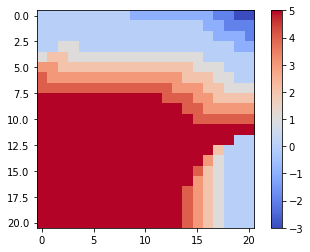

In [134]:
plt.imshow(pi, cmap='coolwarm')
plt.colorbar()
plt.show()